## Load basic modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

plt.style.use('seaborn-white')

## Define the analytical solution of head and location of groundwater divide

In [11]:
def analytical_hds_solover(w, hk, x):
    return np.sqrt(h1**2 - (h1**2 - h2**2) * x / L + w / hk * (L - x) * x)

def analytical_gw_divide(w, hk):
    return L / 2 - hk / w * (h1**2 - h2**2) / (2 * L)

## Paramater settings

In [12]:
h1 = 51
h2 = 49
L = 10000.0 
x0 = 7000
w = 0.0000543
hk = 15
nx = 1001
x = np.linspace(0, L, nx, endpoint=True)

Y= analytical_hds_solover(w, hk, x)
xd = analytical_gw_divide(w, hk)

## Sketch plot

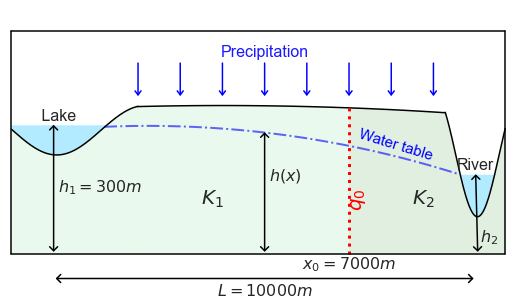

In [14]:
plt.figure(figsize=(9, 5))

# Plot water table 
plt.plot(x[120:-40], Y[120:-40], c='b', linestyle='-.', lw=2, alpha=0.6)
plt.text(7200, 49.8, 'Water table', fontsize=15, color='b', rotation=-17)

'''
# Plot groundwater divide
plt.plot([xd, xd], [46, 51.95], c='r')
plt.text(xd + 150, 51, 'Groundwater divide', fontsize=15, color='k', rotation=90)
'''

# Plot q0
plt.text(x0, 48, '$q_0$', fontsize=20, color='r', rotation=90)

# Plot the right river
xr = np.linspace(9280, 10700, 1000)
yr = 2.5 * np.sin(0.00306 * xr - 2200)+50
plt.plot(xr, yr, 'k')
plt.fill_between(xr[260:-160], 49.2, yr[260:-160], facecolor='deepskyblue', edgecolor='', alpha=0.3)
plt.text(10000, 49.4, 'River', fontsize=16, ha='center')

# Plot the left river
xl = np.linspace(-1000, 2000, 1000)
yl = 1 * np.sin(0.0015 * xl - 2050)+51
plt.plot(xl, yl, 'k')
plt.fill_between(xl[:-250], 51.2, yl[:-250], facecolor='deepskyblue', edgecolor='', alpha=0.3)
plt.text(-400, 51.4, ' Lake', fontsize=16)

# Plot the ground surface
t = np.linspace(1.465, np.pi/1.95, 100)
xe = 4000 + 50000 * np.cos(t)
ye = 0 + 52 * np.sin(t)
plt.plot(xe, ye, 'k')

# Plot the hydraulic conductivity zone
plt.plot([x0, x0], [46, 51.9], c='r', linestyle=':', lw=3)
plt.text(3500, 48, '$K_1$', fontsize=20)
plt.text(8500, 48, '$K_2$', fontsize=20)

plt.fill_between(xr, 46, yr, facecolor='g', edgecolor='', alpha=0.12)
plt.fill_between(xe[:-68], 46,  ye[:-68], facecolor='g',edgecolor='', alpha=0.12)

plt.fill_between(xe[-69:], 46,  ye[-69:], facecolor='#37c959', edgecolor='', alpha=0.1)
plt.fill_between(xl[:-4], 46, yl[:-4], facecolor='#37c959', edgecolor='', alpha=0.1)

# Annotate
plt.annotate('', xy=(0, 46), xytext=(0, 51.3),
            arrowprops={'arrowstyle': '<->, head_width=0.4', 'lw': 1.5, 'ec': 'k'})
plt.text(100, 48.5, '$h_1=300 m$', fontsize=16)

plt.annotate('', xy=(10050, 46), xytext=(10000, 49.3),
            arrowprops={'arrowstyle': '<->, head_width=0.4', 'lw': 1.5, 'ec': 'k'})
plt.text(10100, 46.5, '$h_2$', fontsize=16)

plt.annotate('', xy=(0, 45), xytext=(10000, 45),
            arrowprops={'arrowstyle': '<->, head_width=0.4', 'lw': 1.5, 'ec': 'k'})
plt.text(5000, 44.3, '$L=10000 m$', fontsize=16, ha='center')

# Plot figure boundary
plt.axis('off')
plt.plot([-1000, 10700], [46, 46], 'k')
plt.plot([-1000, -1000], [46, 55.0], 'k')
plt.plot([10700, 10700], [46, 55.0], 'k')
plt.plot([-1000, 10700], [55, 55.0], 'k')

# plt.text(xd, 45.4, '$x_d$', fontsize=16, ha='center')
plt.text(x0, 45.4, '$x_0 = 7000 m$', fontsize=16, ha='center')

# Plot recharge lines
for px in [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]:
    plt.annotate('', xy=(px, 53.8), xytext=(px, 52.3),
                arrowprops={'arrowstyle': '<-, head_width=0.3', 'lw': 1.5, 'ec': 'b'})
plt.text(5000, 54, 'Precipitation', fontsize=16, ha='center', color='b', alpha=0.9)

# Plot h(x)
plt.annotate('', xy=(5000, 51), xytext=(5000, 46),
                arrowprops={'arrowstyle': '<->, head_width=0.4', 'lw': 1.5, 'ec': 'k'})
plt.text(5500, 49, '$h(x)$', fontsize=16, ha='center')

plt.xlim([-1100, 10800])
plt.ylim([45, 56])

# Save figure
# plt.savefig('Figure1.jpg', dpi=600, bbox='tight')
plt.show()